# 1. Importing libraries

In [1]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# loading, manipulation and plotting the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# splitting the data
from sklearn.model_selection import train_test_split

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# model evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 2. Loading the data

In [2]:
car_df = pd.read_csv('./data/car data.csv')

In [3]:
# getting first five rows from car_df dataframe
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# getting Statistical info about the numerical columns in the data
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# getting info about the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# From above data we get to know two things :
* Is there any null values in the dataset
* Data type of each columns

In [6]:
# we know that this dataset does not have any null values but let us clarify again in other method
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**confirmed there are no null values in the dataset**

# 3. Data preparation

In [7]:
# we will drop 'Car_Name' column from our car_df dataframe
car_df.drop('Car_Name', axis=1, inplace=True)

In [8]:
# converting categorical data columns like ['Fuel_Type', 'Seller_Type', 'Transmission'] into numerical columns
car_df = pd.get_dummies(data=car_df, drop_first=True)

In [9]:
# checking the columns datatypes
car_df.dtypes

Year                        int64
Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

**Categorical columns are converted to numerical columns**

In [10]:
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [11]:
X = car_df.drop('Selling_Price', axis=1) # features or independent variables 
y = car_df['Selling_Price'] # outcome or target or dependent variable

# 4. Splitting the datasets into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 5. Data modelling

In [13]:
# lets us put all our regression models into dictionary

models = {'Linear' : LinearRegression(),
          'RandomForest' : RandomForestRegressor(),
          'DecisionTree' : DecisionTreeRegressor(),
          'GradientBoosting' : GradientBoostingRegressor(),
          'AdaBoost' : AdaBoostRegressor()}

In [14]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [15]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [16]:
model_scores

{'Linear': 0.8967757138894821,
 'RandomForest': 0.955031839520299,
 'DecisionTree': 0.9470616815298492,
 'GradientBoosting': 0.9739950880621487,
 'AdaBoost': 0.9405518245600222}

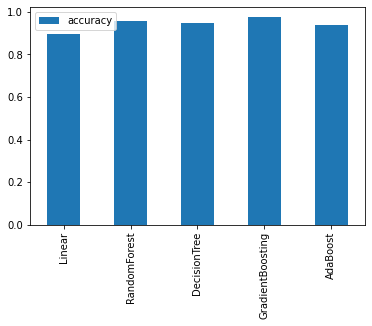

In [17]:
compare_models = pd.DataFrame(model_scores, index=['accuracy'])
compare_models.T.plot(kind = 'bar')

**from above information we can say that Gradient boosting is giving higher accuracy than other models, so we choose Gradient Boosting as the good estimator for this dataset** 

In [18]:
gradient_boost_model = GradientBoostingRegressor()
gradient_boost_model.fit(X_train, y_train)
gradient_boost_model.score(X_test, y_test)

0.9739881476361761

# 6. Model Evaluations

In [19]:
predictions = gradient_boost_model.predict(X_test)

In [20]:
# model predictions
predictions[:5]

array([2.52613006, 1.11901635, 0.76554723, 0.36659667, 5.27280518])

In [21]:
# Actuals
y_test[:5]

227    2.55
123    1.00
130    0.75
168    0.42
268    4.80
Name: Selling_Price, dtype: float64

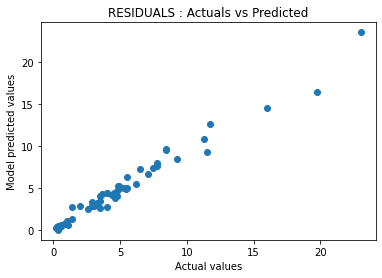

In [22]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual values')
plt.ylabel('Model predicted values')
plt.title('RESIDUALS : Actuals vs Predicted')
plt.show()

In [23]:
# calculating mean_square_error, mean_absolute_error and r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2_score = r2_score(y_test, predictions)

In [24]:
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)
print("R2_score : ", r2_score)

Mean Squared Error :  0.5509395014232108
Mean Absolute Error :  0.4594688212355292
R2_score :  0.973988147636176


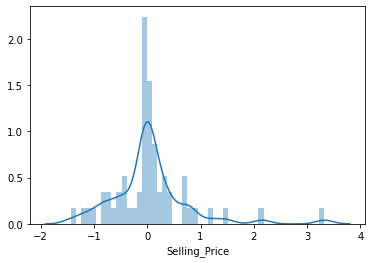

In [25]:
# Residual plot : MAKE SURE ITS LOOKS LIKE NORMAL DISTRIBUTION
sns.distplot((y_test - predictions), bins=50)

# 7. Making predictions 

In [26]:
X_test[:1]

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
227,2011,4.43,57000,0,0,1,0,1


In [27]:
custom_data_prediction = gradient_boost_model.predict([[2020, 14.0, 80000, 0, 0, 1, 0, 1]])

In [28]:
custom_data_prediction

array([9.95583647])

###  For given custom inputs data :

* year = 2020
* present_price = 14.0
* kms_driven = 80000
* owner = 0
* fuel_type_diesel = 0
* fuel_type_petrol = 1
* seller_type_indivdual = 0
* transmission_manual = 1

## PREDICTED :

Selling price is = 9.955

# END